In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

config number 1 --------------


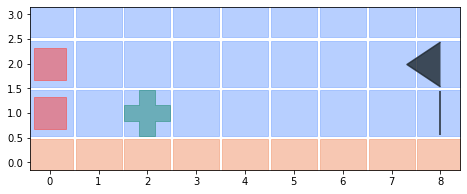

config number 2 --------------


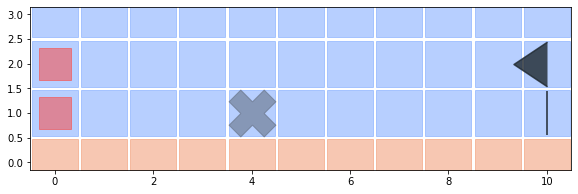

config number 3 --------------


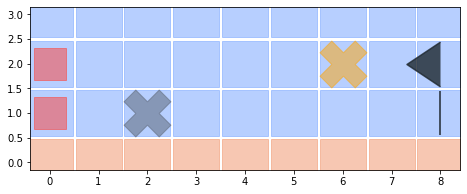

config number 4 --------------


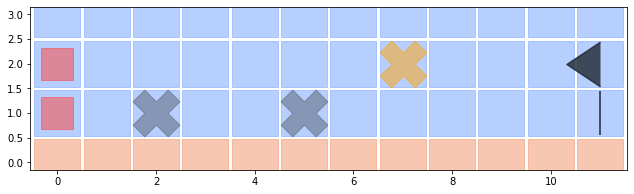

config number 5 --------------


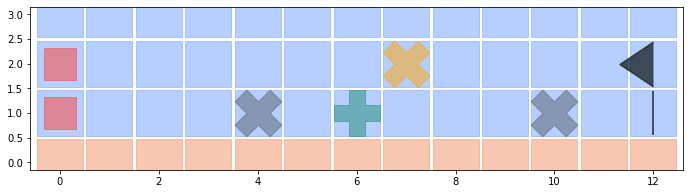

config number 6 --------------


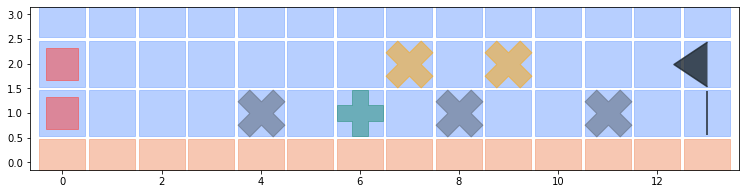

config number 7 --------------


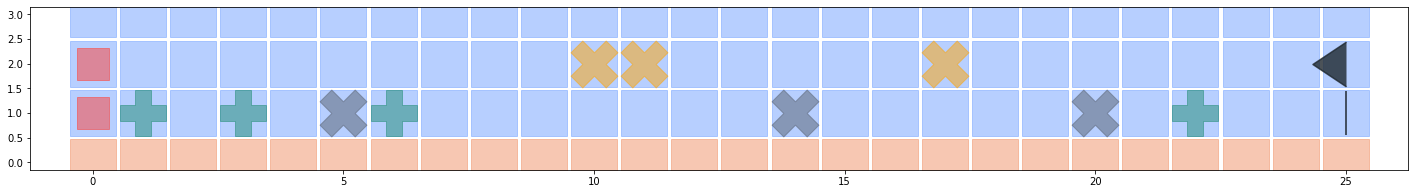

config number 8 --------------


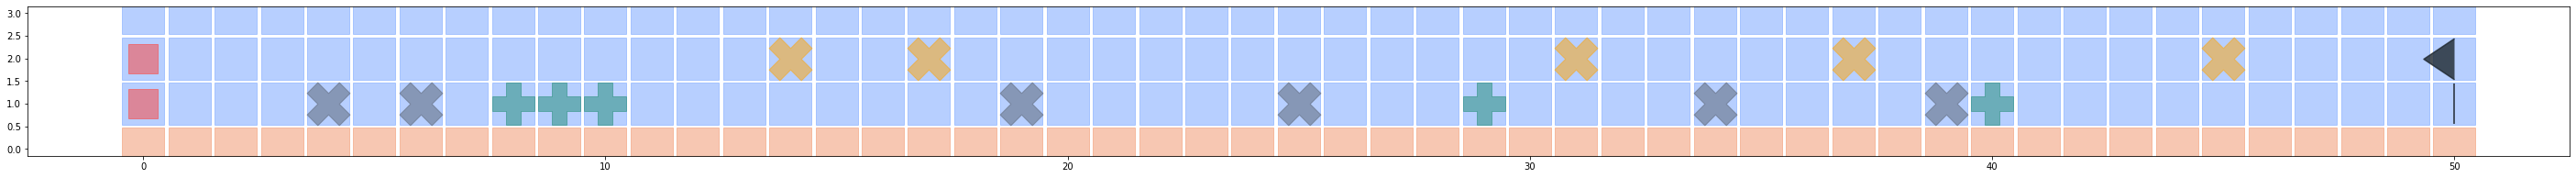

config number 9 --------------


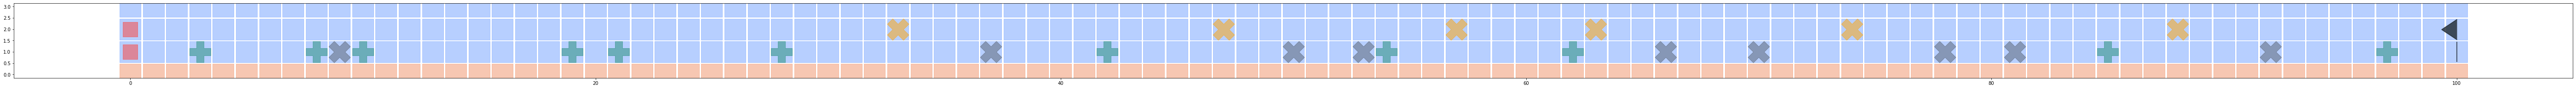

config number 10 --------------


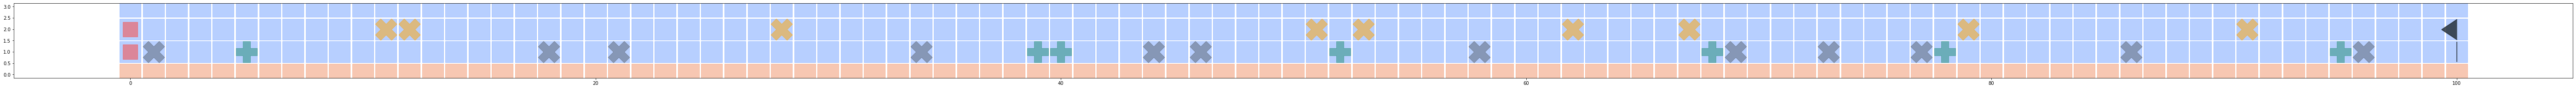

In [2]:
# getting input map file and making "config" object filled with necessary informations

ground_y = 1
goomba_y = 1
mushroom_y = 1
lakitu_y = 2
top_y = 3


def setup_map_config(file_name):
    
    file = open(file_name)
    line = file.readline()
    header = line.strip()
    
    goomba = []

    ground   = [i for i, x in enumerate(line) if x == "_"] # y = 1
    goomba   = [i for i, x in enumerate(line) if x == "G"] # y = 1
    mushroom = [i for i, x in enumerate(line) if x == "M"] # y = 1
    lakitu   = [i for i, x in enumerate(line) if x == "L"] # y = 2
    luigi    = [(0, ground_y), (0, ground_y + 1)]
    
    sky = []
    for i in range(len(line) + 1):
            sky.append((i, ground_y))
            sky.append((i, lakitu_y))
            sky.append((i, top_y))
            

    return {
        'level'    : line,
        'ground'   : ground,
        'goomba'   : goomba,
        'lakitu'   : lakitu, 
        'mushroom' : mushroom,
        'sky'      : sky,
        'luigi'    : luigi,
    }

# visualizer
def draw_config(config, save=False, path=None ,file_name=None, show=True, dpi=100):
    
    level    = config['level']
    ground   = config['ground']
    goomba   = config['goomba']
    lakitu   = config['lakitu']
    mushroom = config['mushroom']
    sky      = config['sky']
    luigi    = config['luigi']
    
    map_size = len(level)

    fig = plt.figure(figsize=(map_size - 0.3, 3))
    kwargs = {
        's'          : 2200,
        'c'          : '#c0392b',
        'marker'     : "s",
        'alpha'      : 0.5,
    }
    
    scale = 1.0
    
    # base
    kwargs['c'] = "#f19066"
    kwargs['marker'] = 's'
    n = [(b / scale, 0) for b in range(map_size + 1)]
    plt.scatter([x[0] for x in n], [x[1] for x in n], **kwargs)

    # sky
    kwargs['c'] = "#70a1ff"
    kwargs['marker'] = 's'
    plt.scatter([s[0] / scale for s in sky], [s[1] for s in sky], **kwargs)
    
    # goomba
    kwargs['c'] = "#57606f"
    kwargs['marker'] = 'X'
    n = [(g, goomba_y) for g in goomba]
    plt.scatter([x[0] / scale for x in n], [x[1] for x in n], **kwargs)
    
    # mushroom
    kwargs['c'] = "#218c74"
    kwargs['marker'] = 'P'
    n = [(m, mushroom_y) for m in mushroom]
    plt.scatter([x[0] / scale for x in n], [x[1] for x in n], **kwargs)
    
    # lakitu
    kwargs['c'] = "#ffa502"
    kwargs['marker'] = 'X'
    n = [(l, lakitu_y) for l in lakitu]
    scat = plt.scatter([x[0] / scale for x in n], [x[1] for x in n], **kwargs)
    
    # luigi
    kwargs['c'] = "#ff3f34"
    kwargs['s'] = 1000
    if len(luigi) == 1:
        kwargs['marker'] = 's'
        scat = plt.scatter(luigi[0][0], luigi[0][1], **kwargs)
    else:
        kwargs['marker'] = 's'
        scat = plt.scatter(luigi[1][0], luigi[1][1], **kwargs)
        
        kwargs['marker'] = 's'
        scat = plt.scatter(luigi[0][0], luigi[0][1], **kwargs)
        
    # flag
    kwargs['s'] = 2000
    kwargs['c'] = "#1e272e"
    kwargs['marker'] = '|'
    kwargs['alpha'] = 1
    plt.scatter(map_size, ground_y, **kwargs)
    kwargs['marker'] = 8
    kwargs['alpha'] = 0.8
    plt.scatter(map_size, ground_y + 1, **kwargs)
    

    ax = scat.axes
#     ax.invert_yaxis()

    if show:
        plt.show()
    if save:
        from pathlib import Path
        if not path:
            path = "../default_export_path/"
        Path(path).mkdir(parents=True, exist_ok=True)
        fig.savefig(f'{path}{file_name}', dpi=dpi)
        plt.close(fig)

# loading map and showing it

inputs = [
    "../attachments/levels/level1.txt",
    "../attachments/levels/level2.txt",
    "../attachments/levels/level3.txt",
    "../attachments/levels/level4.txt",
    "../attachments/levels/level5.txt",
    "../attachments/levels/level6.txt",
    "../attachments/levels/level7.txt",
    "../attachments/levels/level8.txt",
    "../attachments/levels/level9.txt",
    "../attachments/levels/level10.txt",
]
main_configurations = [setup_map_config(f) for f in inputs]
for index,c in enumerate(main_configurations):
    print(f'config number {index + 1} --------------')
    draw_config(c, save=True, path="../output/map/", file_name=f"{index + 1}.png")

In [ ]:
import copy
import subprocess
solu = do_actions(state_maker('0000100002200100200100001'), main_configurations[6])

index = 5
if solu:
    conf = copy.deepcopy(main_configurations[index + 1])
    for idx,s in enumerate(solu):
        conf['luigi'] = s['luigi']
        conf['mushroom'] = s['mushroom']
        draw_config(conf, save=True, path=f'../output/result/{index + 1}/', file_name=f'{idx + 1:04d}.png', show=True, dpi=100)

        
    cmd = ['ffmpeg', '-y', '-framerate', '3', '-i', f'../output/result/{index + 1}/%04d.png', f'../output/result/{index + 1}/output.gif']
    process = subprocess.run(cmd, capture_output=True, text=True)

In [286]:
import copy
import math
import random

class State():
    S = 0 # standing (on land - two blocks)
    F = 1 # floating (in air - two blocks)
    D = 2 # dodging (on land - one block)


class Game:
    def __init__(self, configuration):
        self.configuration = configuration
        self.level = configuration['level']
        self.level = self.level + 'F' # this is for flag
        
        
    def state_generator(self, action_sequence):
        state = State.S
        next_state = None

        states = [state]
        for index, s in enumerate(action_sequence):
            if state == State.S:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.F
                if s == '2': next_state = State.D
                    
            elif state == State.F:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.S
                if s == '2': next_state = State.S
                    
            elif state == State.D:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.F
                if s == '2': next_state = State.D
            states.append(next_state)
            state = next_state
        return states
        
        
    def score(self, action_sequence):
        if len(action_sequence) + 1 != len(self.level):
            return None
        
        situations = list(zip(self.state_generator(action_sequence), self.level))
        
        point = 0
        defeat = False
        
        for index, situation in enumerate(situations):
            if situation == (State.F, 'F'): point += 1 # capturing flag on air
            if situation == (State.S, 'M'): point += 2 # eating mushroom 
            if situation == (State.D, 'M'): point += 2 # eating mushroom
                
            if (situation == (State.F, '_') or \
                situation == (State.F, 'G') or \
                situation == (State.F, 'M')) and \
                situations[index + 1] == (State.S , 'G'):
                point += 2 # killing goomba
            
            if situation == (State.F, '_') or situation == (State.F, 'M'):
                if situations[index + 1] == (State.S, '_'):
                    point -= 0.5 # unnecessury jumping
                    
            
            if (situation == (State.S, 'G') and situations[index - 1][0] != State.F) or \
                situation == (State.D, 'G') or \
                situation == (State.F, 'L') or \
                situation == (State.S, 'L'):
                
                point -= 10 
                defeat = True
                
            # one score for each step
            # for bias - not overlapping very loseful states and loseless but good solution
            point += 1 
                
        if defeat:
            if point < 0:
                return -1;
            return -1 * point
        else:
            return point
    
   
    # this is for visualization
    def do_interactions(self, action_sequence):
        mushroom = copy.deepcopy(self.configuration['mushroom'])
        goomba = copy.deepcopy(self.configuration['goomba'])
        result = []

        states = self.state_generator(action_sequence)
        for index, s in enumerate(states):
            luigi = []
            if s == State.S:
                luigi.append((index, ground_y))
                luigi.append((index, ground_y + 1))

                if index in mushroom:
                    mushroom.remove(index)
                    
                if index in goomba and states[index - 1] == State.F:
                    goomba.remove(index)

            elif s == State.F:
                luigi.append((index, ground_y + 1))
                luigi.append((index, ground_y + 2))

            elif s == State.D:
                luigi.append((index, ground_y))

                if index in mushroom:
                    mushroom.remove(index)

            result.append({
                'luigi': luigi,
                'mushroom' : copy.deepcopy(mushroom),
                'goomba' : copy.deepcopy(goomba)
            })
    #         result['luigi'].append(luigi)
    #         result['mushroom'].append(copy.deepcopy(mushroom))

        return result    


In [178]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
def draw_result(result):

    ul = [round(x['max'], 3) for x in result['history']] # upper limit
    y  = [round(x['avg'], 3) for x in result['history']] # average values
    ll = [round(x['min'], 3) for x in result['history']] # lower limit
    errors = [ll, ul]

    kwargs = {}
    kwargs['marker'] = 'o'
    kwargs['s'] = 14
    kwargs['c'] = '#16a085' 


    lower_limit = round(min([x['min'] for x in result['history']])) - 1 
    upper_limit = round(max([x['max'] for x in result['history']])) + 1
    scale_offset = (upper_limit - lower_limit) / 100
    fig, ax = plt.subplots(figsize=(20, 6 + scale_offset))
    ax.set_xlim(-2, len(y) + 2)
    ax.set_ylim(lower_limit - scale_offset*2 , upper_limit + scale_offset*2)

    # Change major ticks to show every 20.
    scale = (upper_limit - lower_limit) / 20
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(scale))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(1))

    kwargs['c'] = '#c0392b'
    ax.scatter(range(len(ul)), ul, label='maximum point', **kwargs)
    ax.plot(range(len(ul)), ul, '--', color='red', alpha=0.4)

    kwargs['c'] = '#16a085'
    ax.scatter(range(len(y)), y, label='average point', **kwargs)
    ax.plot(range(len(y)), y , '--', color='grey', alpha=0.4)

    kwargs['c'] = '#2980b9'
    ax.scatter(range(len(ll)), ll, label='minimum point', **kwargs)
    ax.plot(range(len(ll)), ll , '--', color='blue', alpha=0.4)

    ax.set_xlabel('population')
    ax.set_ylabel('point')

    plt.grid(which='major', color='#CCCCCC', linestyle='--')
    plt.grid(which='minor', color='#CCCCCC', linestyle=':')
    plt.legend(loc='lower right')
    plt.show()


In [325]:
import numpy as np
from numpy.random import choice

class GeneticAlgorithm:

    def __init__(self, game, first_population, crossover_mode, mutation_distribution, selection_power):
        self.current_population    = first_population
        self.game                  = game
        self.crossover_mode        = crossover_mode
        self.mut_dist              = mutation_distribution
        self.sp                    = selection_power
        
        
    def run(self, max_step):
        result = {
            "last_population": None,
            "history": [],
        }
        
        step = 1
        while(True):
            new_population = []
            candidates, distribution = self.make_candidate_list(self.current_population)
            
            maximum_point = candidates[-1][1]
            minimum_point = candidates[ 0][1]
            average = sum([x[1] for x in candidates]) / len(candidates)
            history_record = {
                "min"        : minimum_point,
                "max"        : maximum_point,
                "avg"        : average,
                "dist"       : distribution,
                "candidates" : candidates
            }
            result['history'].append(history_record)
            
            while len(self.current_population) != len(new_population):
                
                parent1, parent2 = self.selection(candidates, distribution)
                child1, child2   = self.crossover(parent1, parent2)
                
                if self.mut_propability_func(): child1 = self.mutation(child1)
                if self.mut_propability_func(): child2 = self.mutation(child2)

                    
                child1 = ''.join([str(x) for x in child1])
                child2 = ''.join([str(x) for x in child2])
                new_population.extend([child1, child2])
                
            self.current_population = new_population # only childs
            self.current_population.extend([x[0] for x in candidates[-5:-1]])

            if step == max_step: break
            else: step += 1
        
        result['last_population'] = self.map2fitness(self.current_population)
        return result
    

    def fitness_function(self, individual):
        return self.game.score(individual)
    
    
    def map2fitness(self, population):
        records = [(individual, self.fitness_function(individual)) for individual in population]
        return sorted(records, key=lambda tup: tup[1])
    

    def make_candidate_list(self, population):
        
        sorted_by_fitness = self.map2fitness(population)
        
        chosen_ones = []
        chosen_ones.extend(sorted_by_fitness[0:20])
        chosen_ones.extend([x for x in sorted_by_fitness if x[1] > 0])
        chosen_ones = sorted(chosen_ones, key=lambda tup: tup[1])
    
        frequencies = [record[1] ** self.sp if record[1] > 0 else abs(record[1]) for record in chosen_ones]
        total_sum = sum(frequencies)
        distribution = [freq / float (total_sum) for freq in frequencies]
        
#         fig = plt.figure(figsize=(20, 6))
#         plt.plot(range(len(distribution)), distribution, c='g')
#         plt.show()
        
        return chosen_ones, distribution
    
    def selection(self, chosen_ones, distribution):
        choices = [x[0] for x in chosen_ones]
        return choice(choices, 2, p=distribution)
    

    def crossover(self, p1, p2):
        child1 = []
        child2 = []
        
        if self.crossover_mode == 'single_point':
            slice_index = math.floor(len(p1) / 2)   

            child1.extend(p1[:slice_index])
            child1.extend(p2[slice_index:])

            child2.extend(p2[:slice_index])
            child2.extend(p1[slice_index:])

            
        elif self.crossover_mode == 'double_point':
            slice_index1 = math.floor(len(p1) / 3)
            slice_index2 = 2 * slice_index1

            child1.extend(p1[:slice_index1])
            child1.extend(p2[slice_index1:slice_index2])
            child1.extend(p1[slice_index2:])

            child2.extend(p2[:slice_index1])
            child2.extend(p1[slice_index1:slice_index2])
            child2.extend(p2[slice_index2:])
            
        else:
            return None

        return child1, child2
    
    
    def mut_propability_func(self):
        distribution = self.mut_dist
        results = [True, False]
        return choice(results, 1, p=distribution)
    
    def mutation(self, child):
        distribution = [0.6, 0.2, 0.2]
        mutates = [0, 1, 2]
        child[random.randint(0, len(child) - 1)] = choice(mutates, 1, p=distribution)[0]
        return child
    
    


running on configuration 0
running on configuration 1
running on configuration 2
running on configuration 3
running on configuration 4
running on configuration 5
running on configuration 6
running on configuration 7
running on configuration 8
running on configuration 9
result for configuration 0 -----------------------


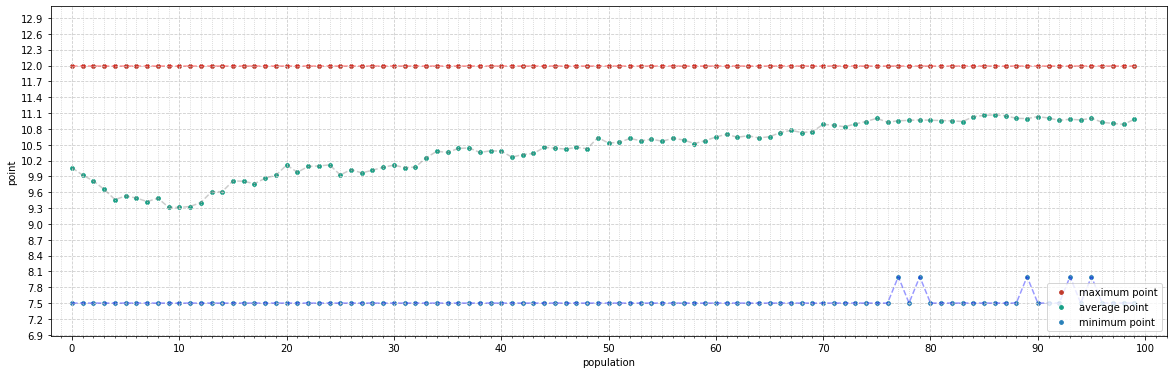

result for configuration 1 -----------------------


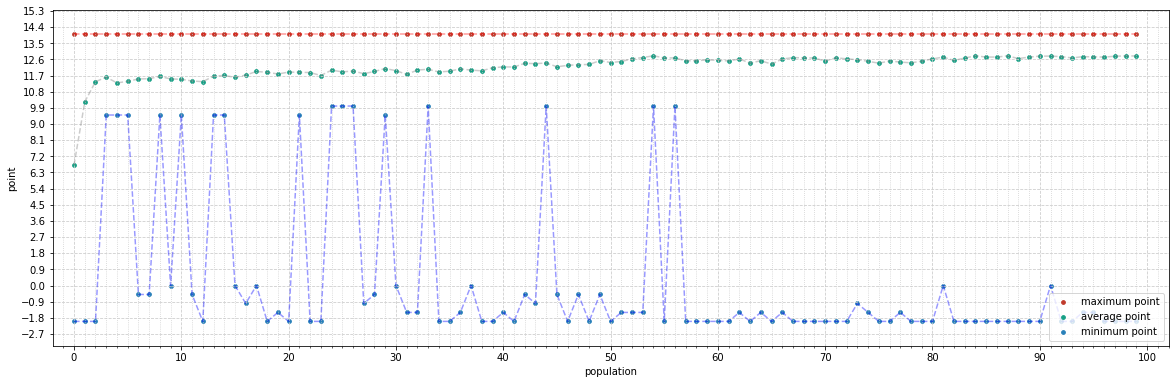

result for configuration 2 -----------------------


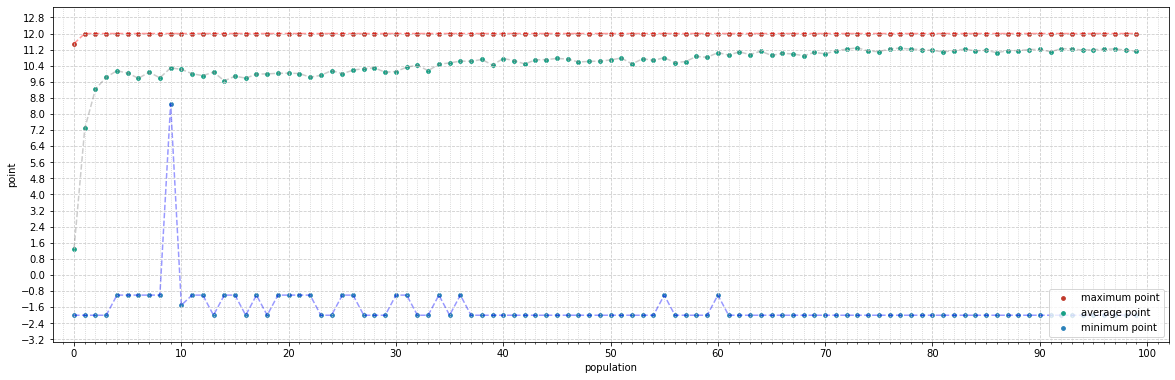

result for configuration 3 -----------------------


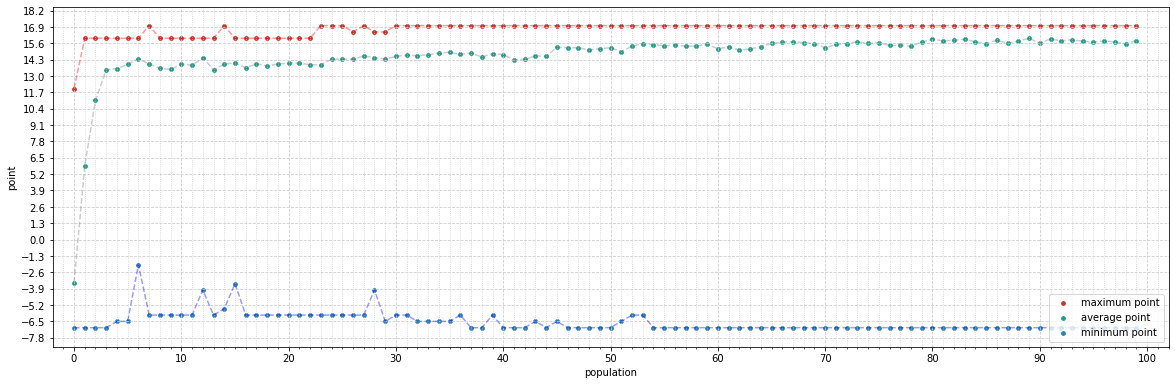

result for configuration 4 -----------------------


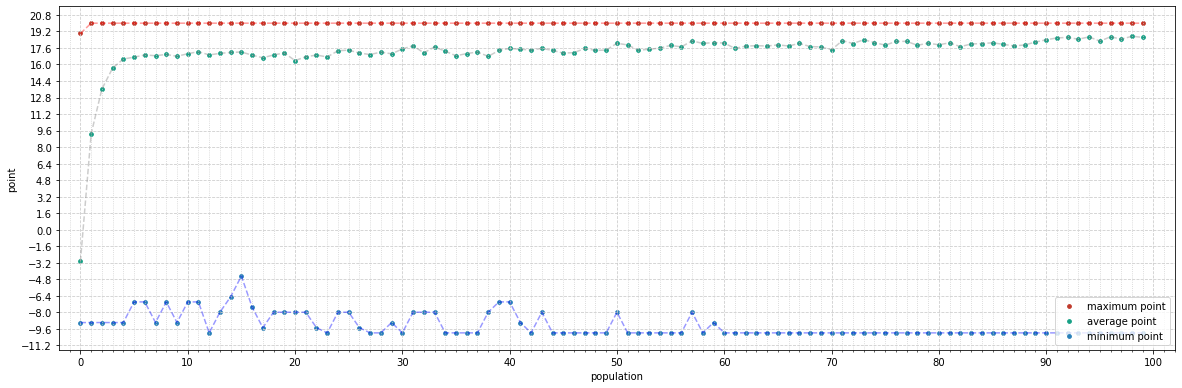

result for configuration 5 -----------------------


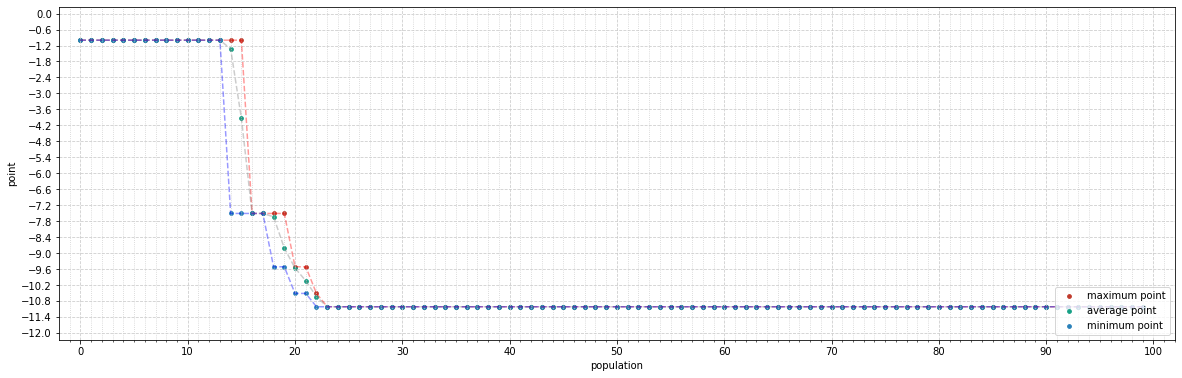

result for configuration 6 -----------------------


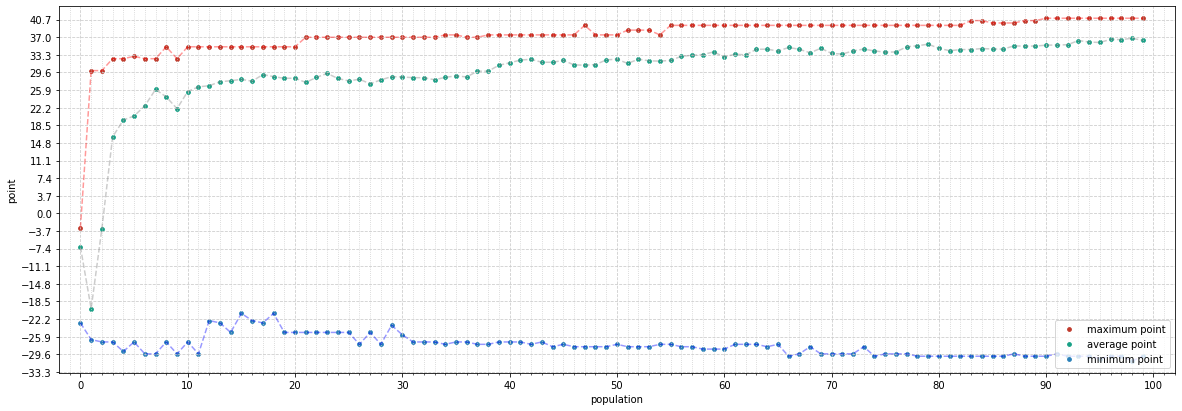

result for configuration 7 -----------------------


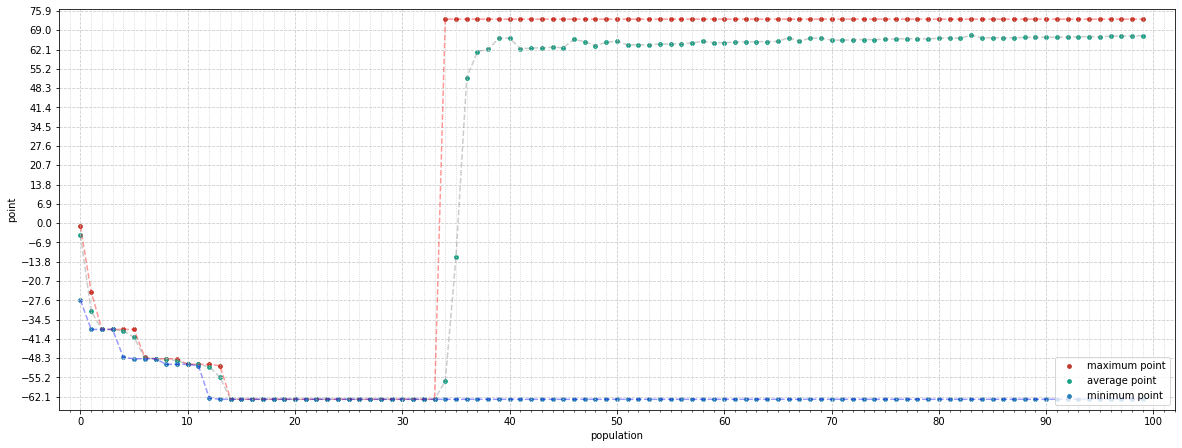

result for configuration 8 -----------------------


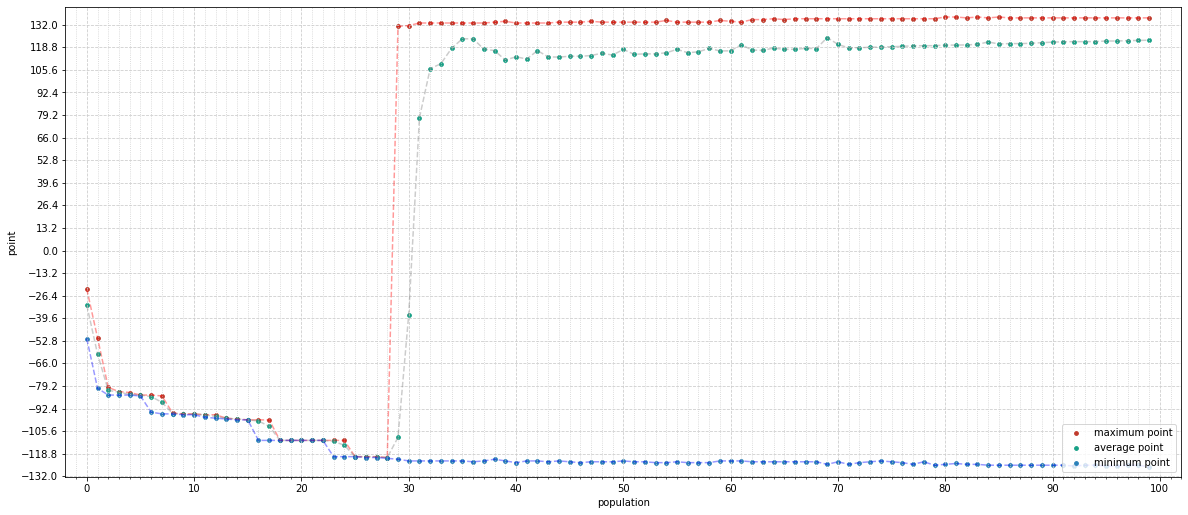

result for configuration 9 -----------------------


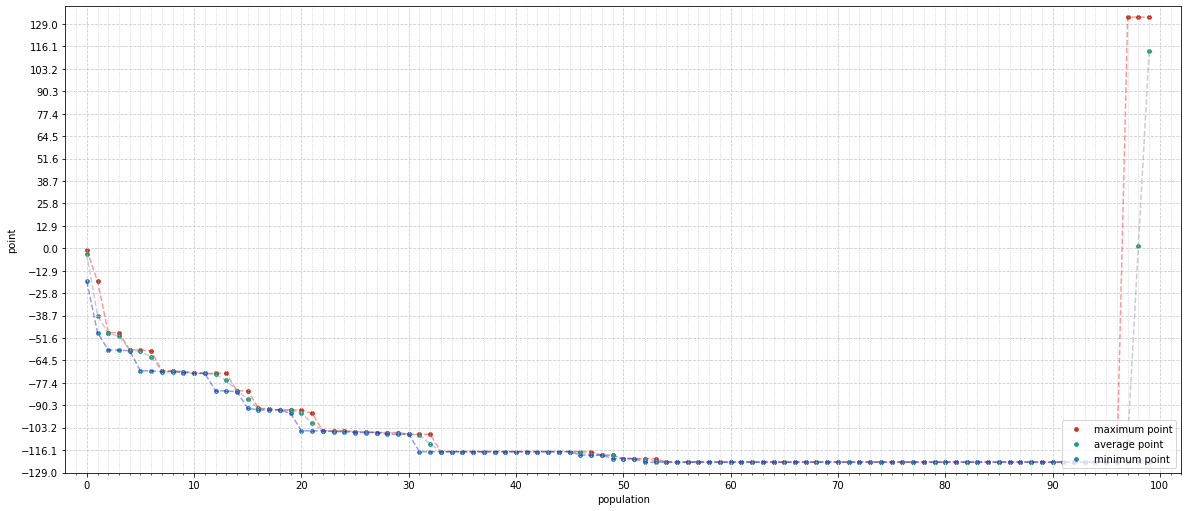

In [326]:
import pprint
population_size = 100
actions = [0, 1, 2]
distribution = [0.6, 0.2, 0.2]


results = []
for index, configuration in enumerate(main_configurations):
    
    population = []
    action_sequence_size = len(configuration['level'])
    for i in range(population_size):
        sequence = []
        sequence.extend(choice(actions, action_sequence_size, p=distribution))
        sequence = [str(x) for x in sequence]
        population.append(''.join(sequence))

    game = Game(configuration)
    genetic_algorithm = GeneticAlgorithm(game, population, 'single_point', [0.1, 0.9], 1)
    
    print(f'running on configuration {index}')
    results.append(genetic_algorithm.run(100))

for index, result in enumerate(results):
    if result:
        print(f'result for configuration {index} -----------------------')
        draw_result(result)


In [327]:
import pprint
import subprocess

index = 9
result = results[index]

path = "../output/result"
for index, result in enumerate(results):
    game = Game(main_configurations[index])
    
    actions = result["last_population"][-1][0]
    score = game.score(actions)
    
    if score > 0:
        print(f'exporting result for configuration {index}')
        steps = game.do_interactions(actions)
        conf = copy.deepcopy(main_configurations[index])
        for idx,s in enumerate(steps):
            conf['luigi']    = s['luigi']
            conf['mushroom'] = s['mushroom']
            conf['goomba']   = s['goomba']
            draw_config(conf, save=True, path=f'{path}/{index + 1}/', file_name=f'{idx + 1:04d}.png', show=False, dpi=100)

        cmd = ['ffmpeg', '-y', '-framerate', '3', '-i', f'{path}/{index + 1}/%04d.png', f'{path}/{index + 1}/output.gif']
        process = subprocess.run(cmd, capture_output=True, text=True)
    else:
        pass
    

#     for history_record in result['history']:
#         print(f"{history_record['min']}, {round(history_record['avg'], 3)}, {history_record['max']}")
#         print([x[1] for x in history_record['candidates']])
#         print([round(x,1) for x in history_record['dist']])

exporting result for configuration 0
exporting result for configuration 1
exporting result for configuration 2
exporting result for configuration 3
exporting result for configuration 4
exporting result for configuration 6
exporting result for configuration 7
exporting result for configuration 8
exporting result for configuration 9


In [241]:
import copy
import math
import random

class State():
    S = 0 # standing (on land - two blocks)
    F = 1 # floating (in air - two blocks)
    D = 2 # dodging (on land - one block)


class Game2:
    def __init__(self, configuration):
        self.configuration = configuration
        self.level = configuration['level']
        self.level = self.level + 'F' # this is for flag
        
        
    def state_generator(self, action_sequence):
        state = State.S
        next_state = None

        states = [state]
        for index, s in enumerate(action_sequence):
            if state == State.S:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.F
                if s == '2': next_state = State.D
                    
            elif state == State.F:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.S
                if s == '2': next_state = State.S
                    
            elif state == State.D:
                if s == '0': next_state = State.S
                if s == '1': next_state = State.F
                if s == '2': next_state = State.D
            states.append(next_state)
            state = next_state
        return states
        
        
    def score(self, action_sequence):
        if len(action_sequence) + 1 != len(self.level):
            return None
        
        situations = list(zip(self.state_generator(action_sequence), self.level))
        
        defeat = False
        point = 0
        for index, situation in enumerate(situations):
            print(situation)
            print(point)
            
            if situation == (State.F, 'F'): point += 1 # capturing flag on air
            if situation == (State.S, 'M'): point += 2 # eating mushroom 
            if situation == (State.D, 'M'): point += 2 # eating mushroom
                
            if situation[0] == State.F and \
               situation[1] != 'F'     and \
               situations[index + 1] == (State.S , 'G'):
                point += 2 # killing goomba
            
            if situation == (State.F, '_') or situation == (State.F, 'M'):
                if situations[index + 1] == (State.S, '_'):
                    point -= 0.5 # unnecessury jumping
                    
            
            if (situation == (State.S, 'G') and situations[index - 1][0] != State.F) or \
                situation == (State.D, 'G') or \
                situation == (State.F, 'L') or \
                situation == (State.S, 'L'):
                
                print("impact")
                point -= 5 
                defeat = True

                
            # one score for each step
            # for bias - not overlapping very loseful states and loseless but good solution
            point += 1 
                
        if defeat:
            if point < 0:
                return -1;
            return -1 * point
        else:
            return point
#         return point if not defeat else -1 * point
    
   
    # this is for visualization
    def do_interactions(self, action_sequence):
        mushroom = copy.deepcopy(self.configuration['mushroom'])
        result = []


        for index, s in enumerate(self.state_generator(action_sequence)):
            luigi = []
            if s == State.S:
                luigi.append((index, ground_y))
                luigi.append((index, ground_y + 1))

                if index in mushroom:
                    mushroom.remove(index)

            elif s == State.F:
                luigi.append((index, ground_y + 1))
                luigi.append((index, ground_y + 2))

            elif s == State.D:
                luigi.append((index, ground_y))

                if index in mushroom:
                    mushroom.remove(index)

            result.append({
                'luigi': luigi,
                'mushroom' : copy.deepcopy(mushroom),
            })
    #         result['luigi'].append(luigi)
    #         result['mushroom'].append(copy.deepcopy(mushroom))

        return result    
    
    
game2 = Game2(main_configurations[5])
game2.score(result['last_population'][-1][0])


(0, '_')
0
(0, '_')
1
(2, '_')
2
(1, '_')
3
(0, 'G')
6
(0, '_')
7
(0, 'M')
8
(1, 'L')
11
impact
(0, 'G')
9
(1, 'L')
10
impact
(0, '_')
6
(2, 'G')
7
impact
(0, '_')
3
(1, 'F')
4


-6

In [147]:
10 ** 100

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000